In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gregorut/videogamesales")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/gregorut/videogamesales/versions/2


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats


In [3]:
# Correct path to the CSV file
path = "/root/.cache/kagglehub/datasets/gregorut/videogamesales/versions/2/vgsales.csv"

# Load the dataset
data = pd.read_csv(path)

# Check the dataset
print(data.head())


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [4]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
data.shape

(16598, 11)

In [6]:
data.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [7]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

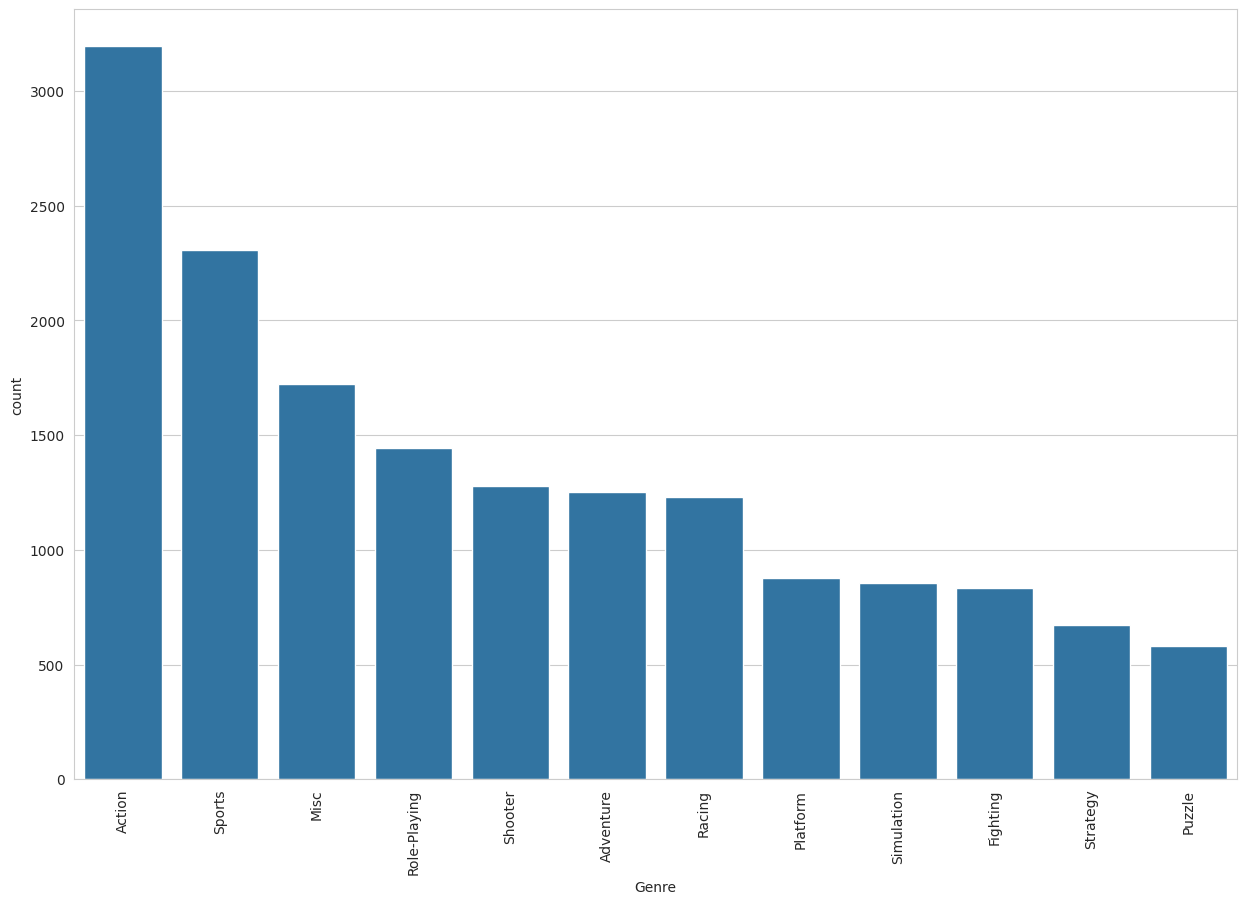

In [9]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  T

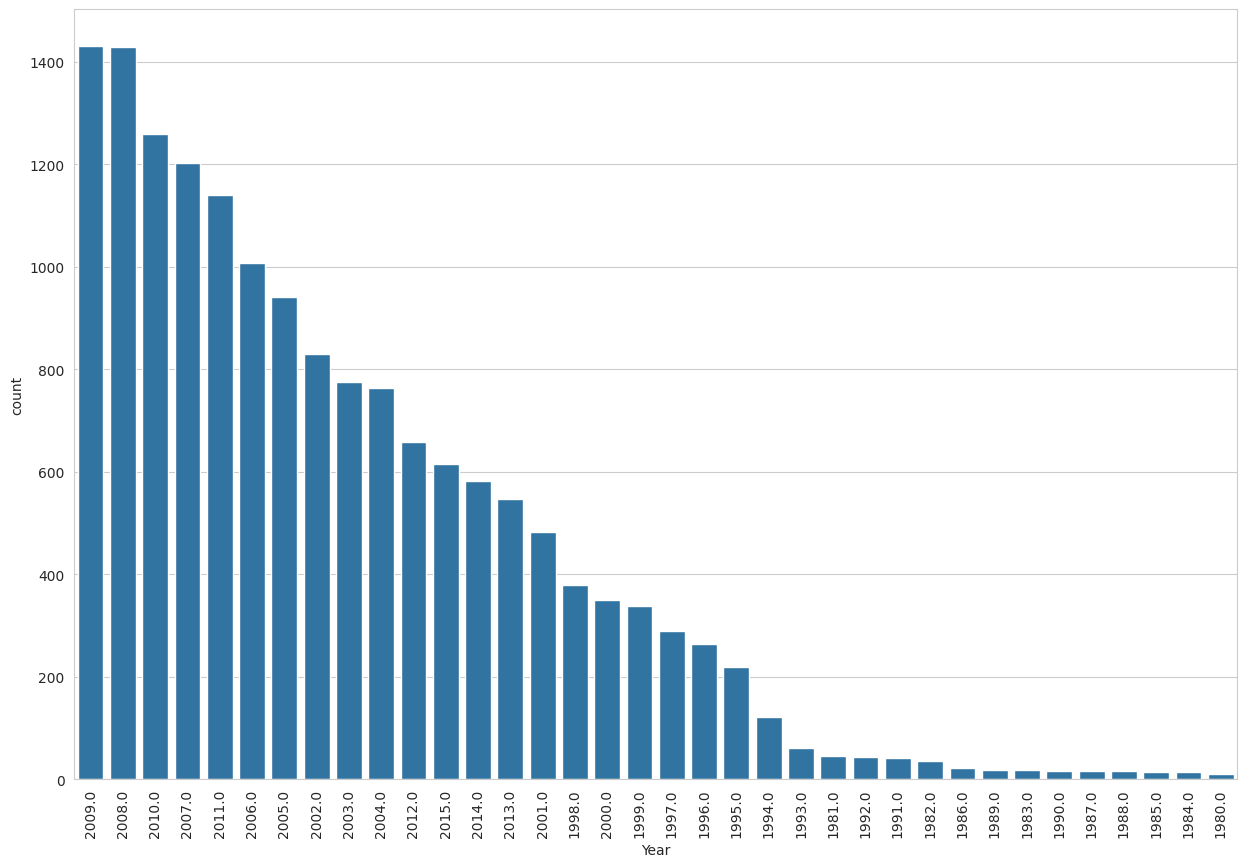

In [10]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

# **Most genre game relase in year**

In [11]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
# year_max_genre

<ipython-input-11-47da62c344d0>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']


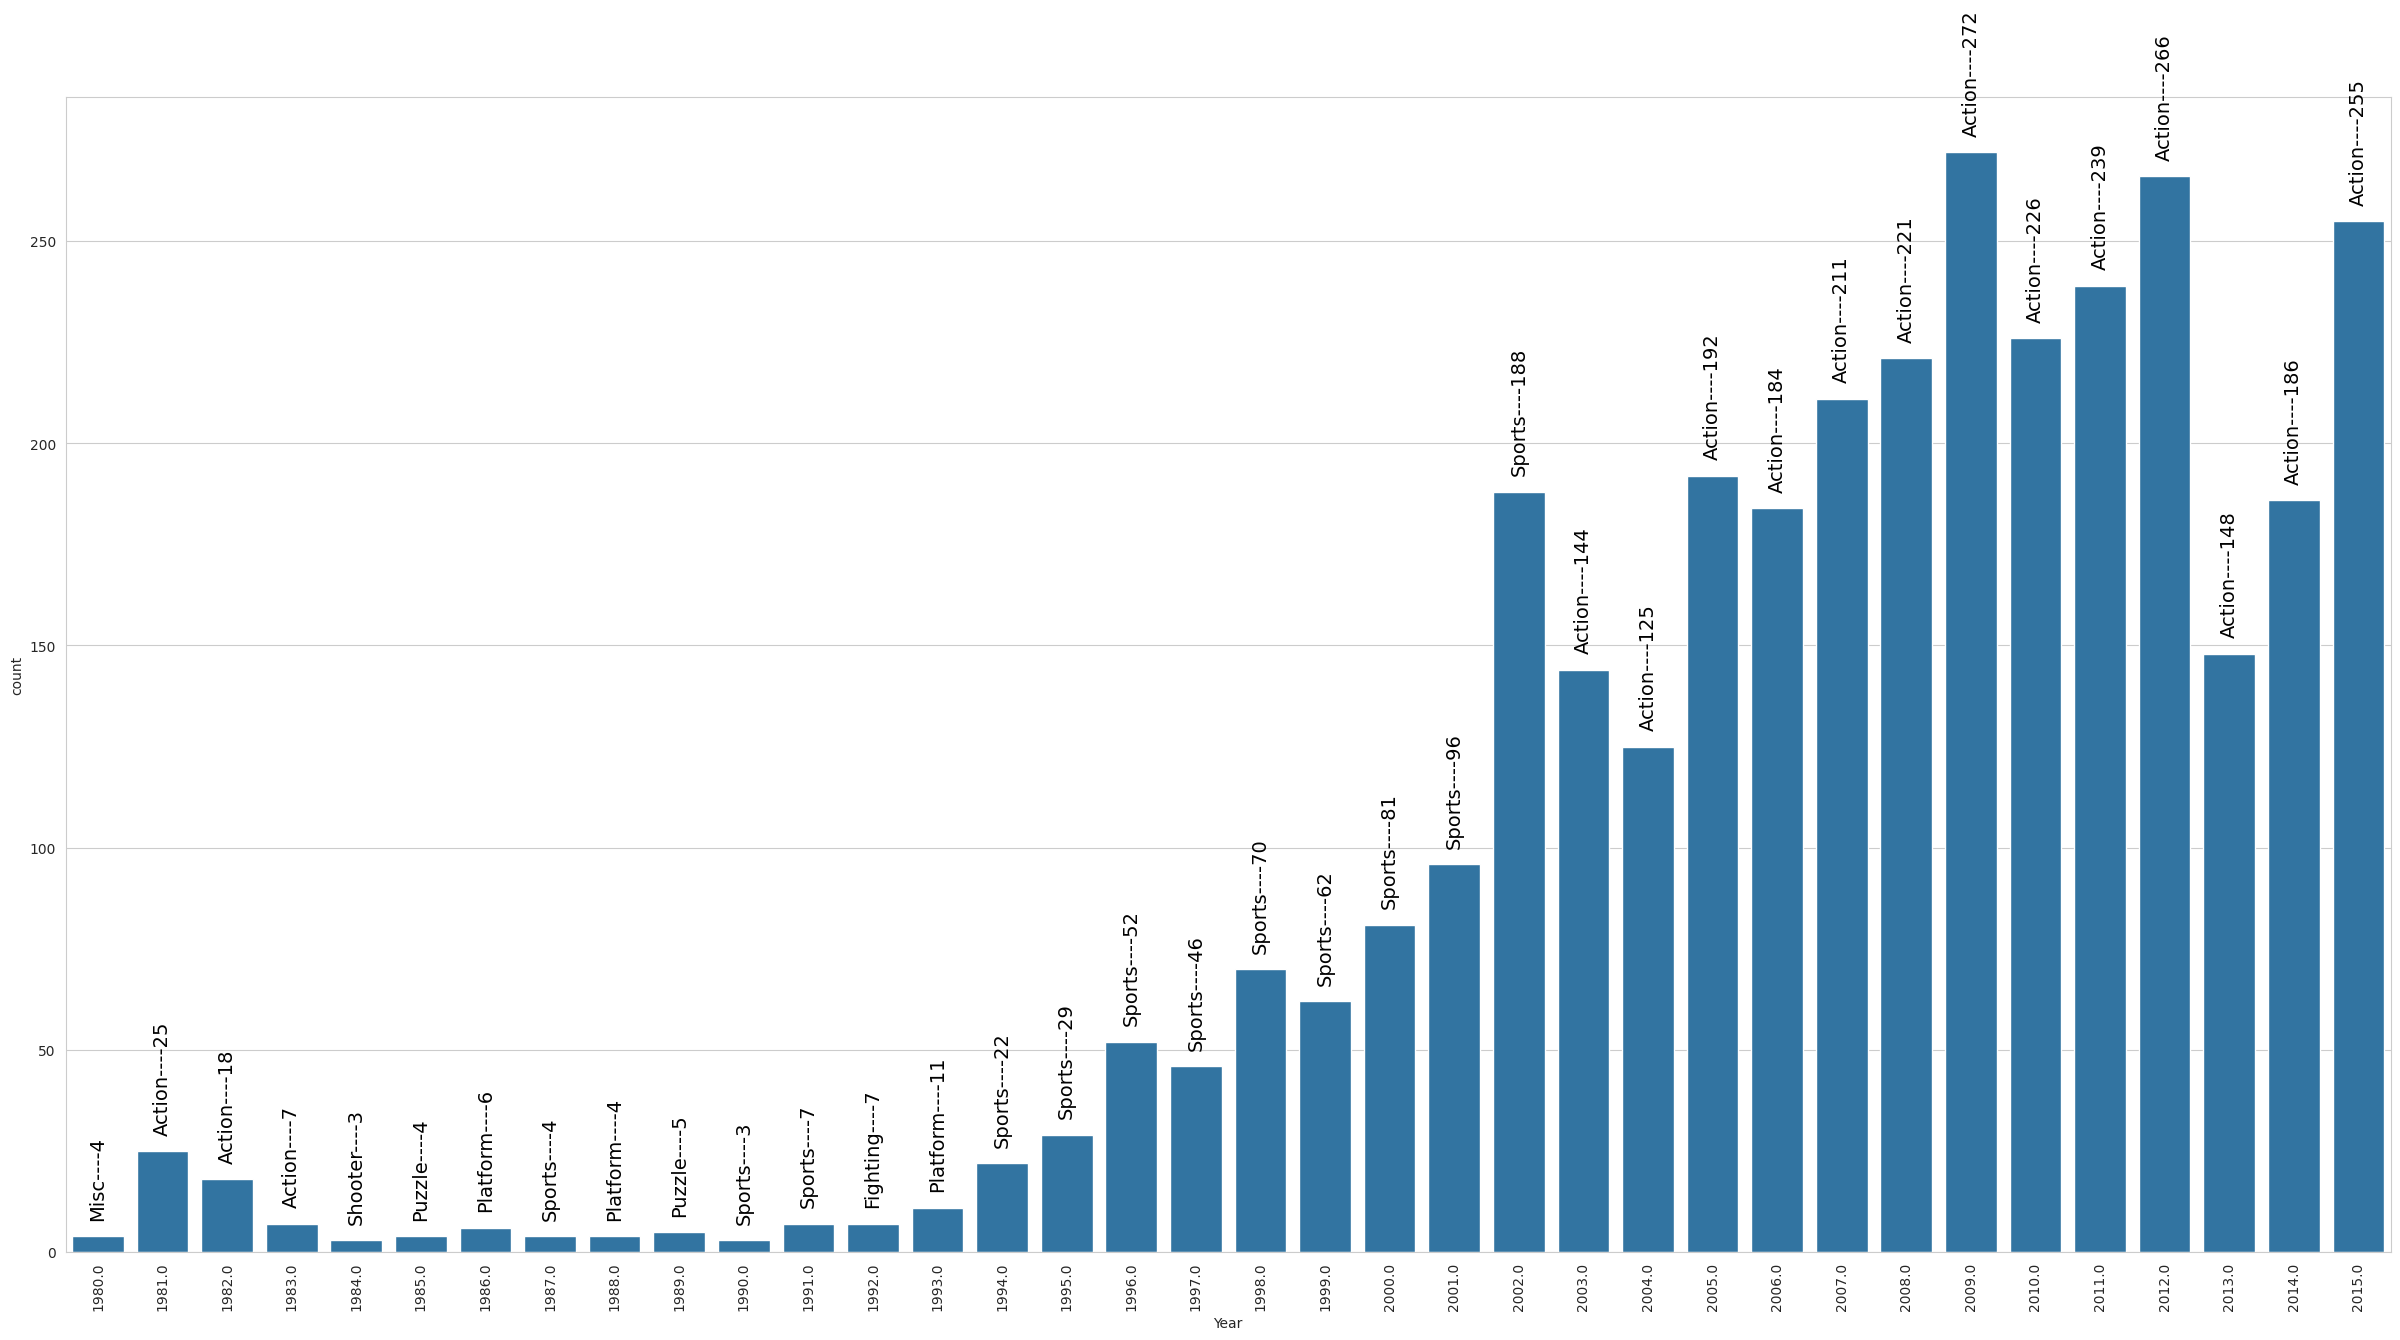

In [12]:
genre = year_max_genre['Genre'].values
# genre[0]

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

# **Highest Platform Sales Prize**

In [13]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'GB'),
  Text(11, 0, 'NES'),
  Text(12, 0, '3DS'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

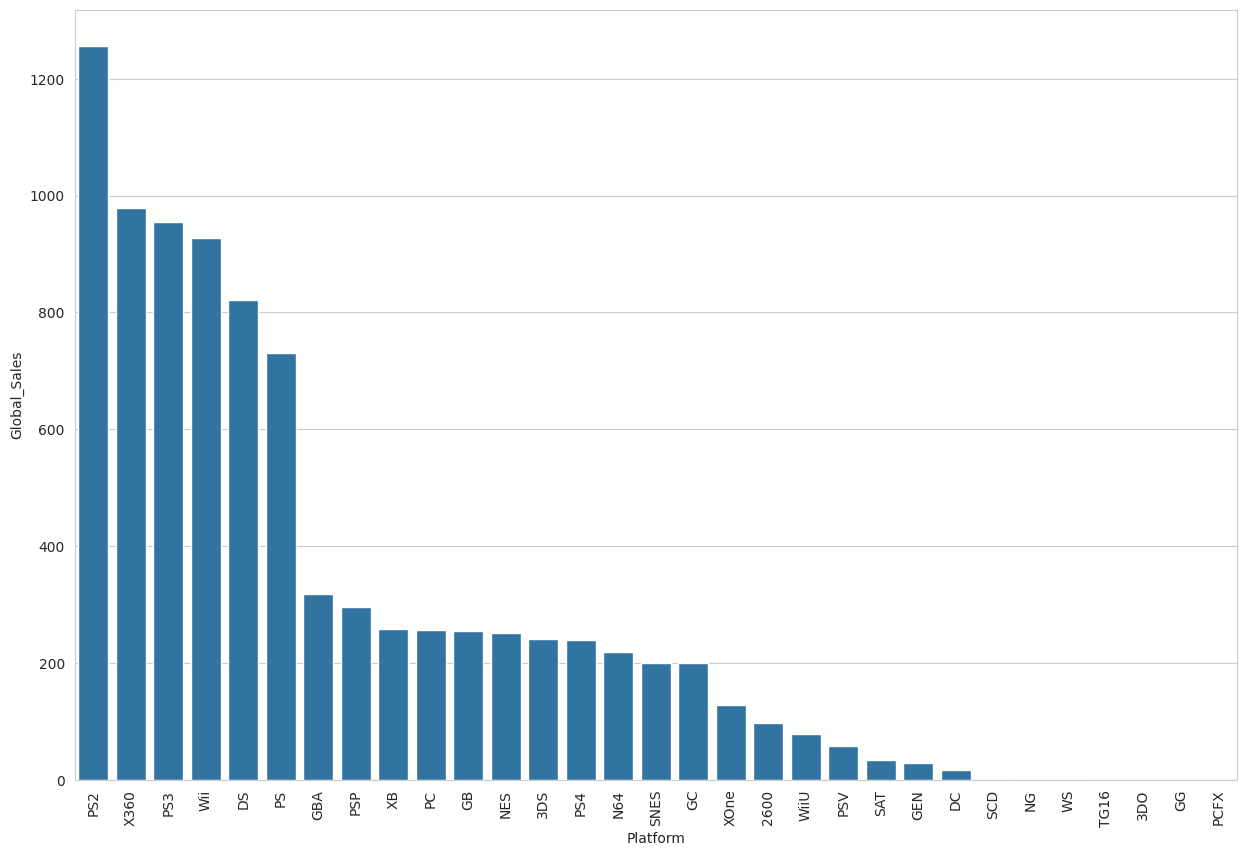

In [14]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

# **Total revenue by region**

In [15]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


<Axes: xlabel='region', ylabel='sale'>

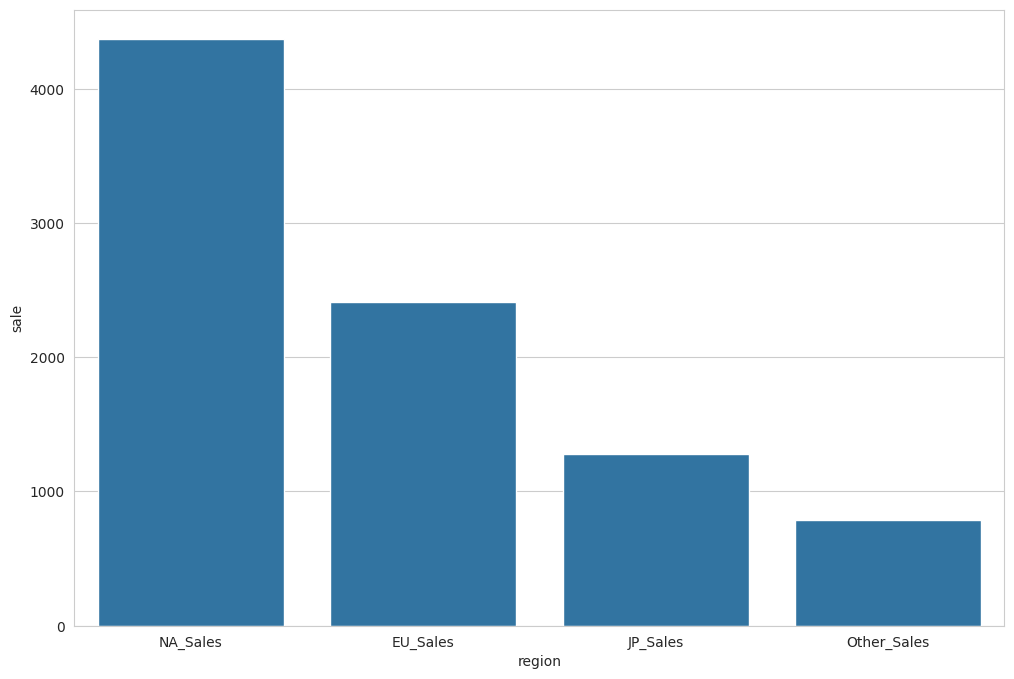

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

# **Predicting Publisher Sales**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [18]:
publisher_sales = data.groupby(['Publisher', 'Year'])['Global_Sales'].sum().reset_index()

In [19]:
# Create lag features (previous year's global sales)
publisher_sales['Prev_Year_Sales'] = publisher_sales.groupby('Publisher')['Global_Sales'].shift(1)

In [20]:
publisher_sales = publisher_sales.dropna()

In [21]:
X = publisher_sales[['Year', 'Prev_Year_Sales']]
y = publisher_sales['Global_Sales']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#train the model
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

Mean Squared Error: 31.828868941485833
R-squared: 0.6961952598926939


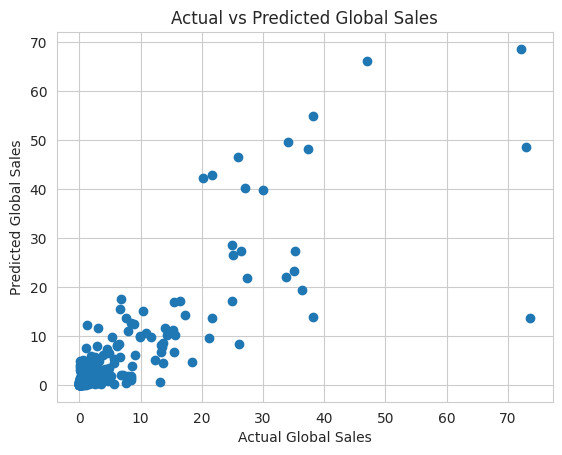

In [24]:
#Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs Predicted Global Sales')
plt.show()

In [25]:
#Predict Future Growth

next_year = 2025
future_data = publisher_sales[['Publisher', 'Year', 'Global_Sales']].copy()
future_data['Next_Year_Sales_Prediction'] = np.nan

for pub in future_data['Publisher'].unique():
    publisher_data = future_data[future_data['Publisher'] == pub]

    if not publisher_data.empty:
        # Prepare input data for prediction (last year data)
        last_year = publisher_data['Year'].max()
        last_year_sales = publisher_data[publisher_data['Year'] == last_year]['Global_Sales'].values[0]

        # Predict the next year's sales
        next_year_data = pd.DataFrame({'Year': [next_year], 'Prev_Year_Sales': [last_year_sales]})
        predicted_sales = rf_model.predict(next_year_data)

        # Store the prediction
        future_data.loc[future_data['Publisher'] == pub, 'Next_Year_Sales_Prediction'] = predicted_sales[0]

# Identify publishers with growth or decline
future_data['Sales_Growth'] = future_data['Next_Year_Sales_Prediction'] - future_data['Global_Sales']
growing_publishers = future_data[future_data['Sales_Growth'] > 0]
declining_publishers = future_data[future_data['Sales_Growth'] <= 0]

print("Publishers Expected to Grow:\n", growing_publishers[['Publisher', 'Sales_Growth']])
print("Publishers Expected to Decline:\n", declining_publishers[['Publisher', 'Sales_Growth']])

Publishers Expected to Grow:
               Publisher  Sales_Growth
1       10TACLE Studios      0.235875
3            1C Company      0.235875
11                  3DO      0.542792
12                  3DO      0.692792
15            505 Games      0.665600
...                 ...           ...
2233          Zoo Games      1.044400
2234          Zoo Games      2.374400
2235          Zoo Games      3.124400
2237        Zushi Games      0.708864
2240  bitComposer Games      0.447700

[897 rows x 2 columns]
Publishers Expected to Decline:
                          Publisher  Sales_Growth
5     20th Century Fox Video Games     -0.017000
8                              3DO     -2.997208
9                              3DO     -1.937208
10                             3DO     -0.307208
16                       505 Games     -0.124400
...                            ...           ...
2229        Zoo Digital Publishing     -0.522500
2230        Zoo Digital Publishing     -0.802500
2231        Zoo 

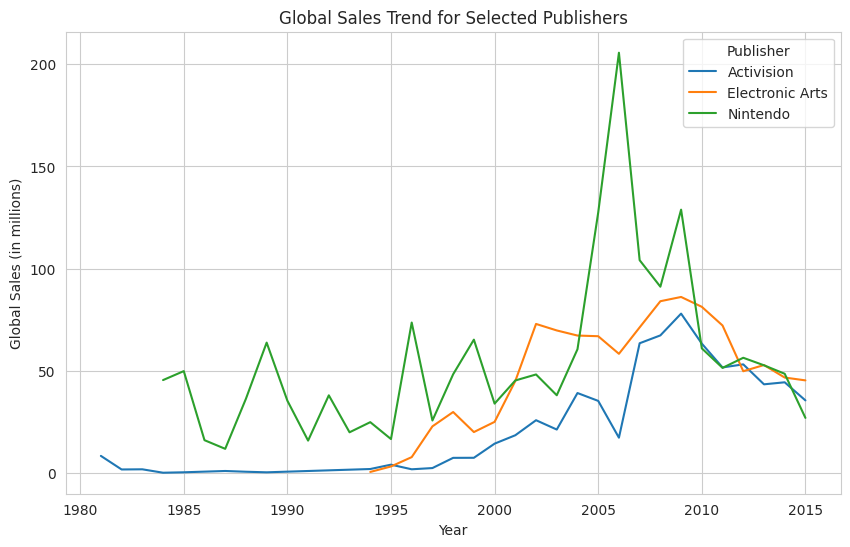

In [26]:
selected_publishers = ['Nintendo', 'Electronic Arts', 'Activision']

# Filter the dataframe to include only the selected publishers
filtered_data = publisher_sales[publisher_sales['Publisher'].isin(selected_publishers)]

# Plot a line chart for the selected publishers
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_data, x='Year', y='Global_Sales', hue='Publisher')
plt.title('Global Sales Trend for Selected Publishers')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Year')
plt.show()

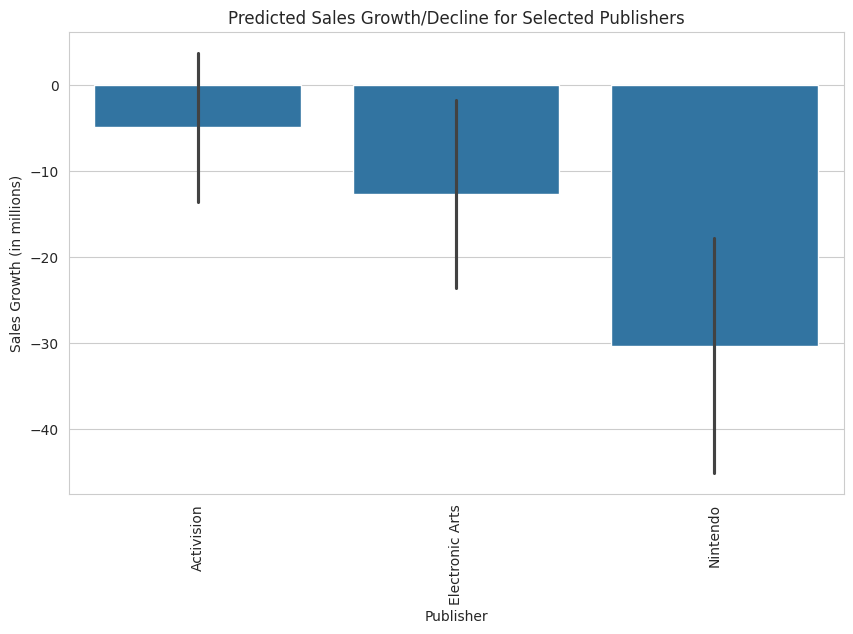

In [27]:
# Filter the future_data for the selected publishers
filtered_future_data = future_data[future_data['Publisher'].isin(selected_publishers)]

# Bar chart for sales growth or decline of selected publishers
plt.figure(figsize=(10,6))
sns.barplot(data=filtered_future_data, x='Publisher', y='Sales_Growth')
plt.title('Predicted Sales Growth/Decline for Selected Publishers')
plt.ylabel('Sales Growth (in millions)')
plt.xlabel('Publisher')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()